In [19]:
import sys
from tqdm.auto import tqdm
from astropy.io import fits
import astropy.units as au
from astropy.coordinates import Angle, SkyCoord
import healpy as hp
import numpy as np

import matplotlib
import matplotlib
matplotlib.style.use('Minh_paper_style')
import matplotlib.pyplot as plt
from matplotlib.ticker import (FixedLocator, MultipleLocator, FixedFormatter, FormatStrFormatter,
                               AutoMinorLocator)
smica_filename='../data/COM_CMB_IQU-smica_2048_R3.00_full.fits'
commander_filename='../data/COM_CMB_IQU-commander_2048_R3.00_full.fits'
nilc_filename='../data/COM_CMB_IQU-nilc_2048_R3.00_full.fits'
sevem_filename='../data/COM_CMB_IQU-sevem_2048_R3.01_full.fits'

In [8]:
hdul = fits.open(smica_filename)
hdul.info()

Filename: ../data/COM_CMB_IQU-smica_2048_R3.00_full.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   ()      
  1                1 BinTableHDU     67   50331648R x 10C   [1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E]   
  2                1 BinTableHDU     18   4097R x 2C   [1E, 1E]   


In [9]:
for count,i in enumerate(hdul):
    print("Header #",count)
    print(i.header)
    print("\n")

Header # 0
SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                   32 / number of bits per data pixel                  NAXIS   =                    0 / number of data axes                            EXTEND  =                    T / FITS dataset may contain extensions            COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H DATE    = '2018-04-20T13:01:36' / file creation date (YYYY-MM-DDThh:mm:ss UT)   END                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [57]:
with fits.open(smica_filename) as hdul:
    data = hdul[2].data
    smica_beam = data.field(0)
with fits.open(commander_filename) as hdul:
    data = hdul[2].data
    commander_beam = data.field(0)
with fits.open(sevem_filename) as hdul:
    data = hdul[2].data
    sevem_beam = data.field(0)
with fits.open(nilc_filename) as hdul:
    data = hdul[2].data
    nilc_beam = data.field(0)
print(smica_beam.shape)
print(smica_beam.sum())
print(commander_beam.sum())
print(nilc_beam.sum())
print(sevem_beam.sum())

(4097,)
2003.7444
2026.939
2005.907
2055.8474


In [56]:
planck_beam = Angle(5.,au.arcmin)
gauss_beam = hp.gauss_beam(planck_beam.to_value(au.rad),lmax=6096)
pix_window = hp.pixwin(nside=2048,lmax=6096)
print((gauss_beam*pix_window).sum())

1971.9447577957494


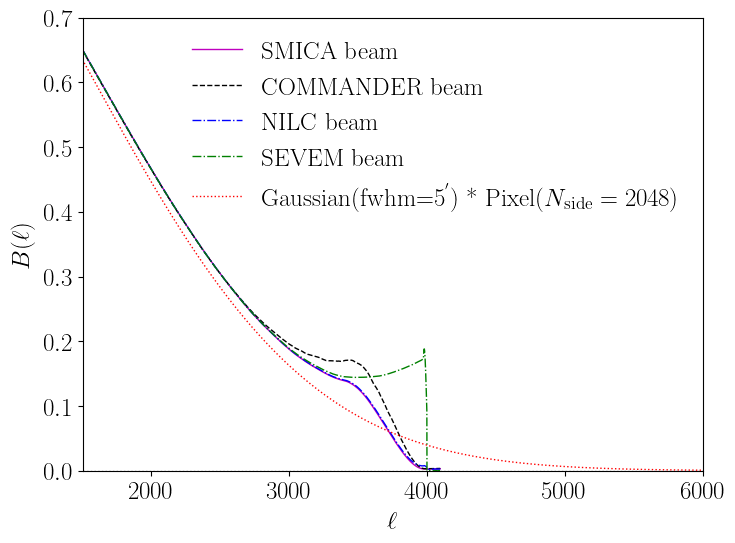

In [54]:
plt.plot(smica_beam,c='m',label='SMICA beam')
plt.plot(commander_beam,c='k',ls='--',label='COMMANDER beam')
plt.plot(nilc_beam,c='b',ls='dashdot',label='NILC beam')
plt.plot(sevem_beam,c='g',ls='-.',label='SEVEM beam')
plt.plot(gauss_beam*pix_window,c='r',ls=':',
         label=r"Gaussian(fwhm=$5^{'}$) * Pixel($N_{\mathrm{side}}=2048$)")
plt.axhline(y=0.,ls=':',c='gray')
plt.ylabel(r'$B(\ell)$')
plt.xlabel(r'$\ell$')
plt.xlim(1500,6000)
plt.ylim(0.,0.7)
plt.legend(frameon=False)

Text(0.5, 0, '$\\ell$')

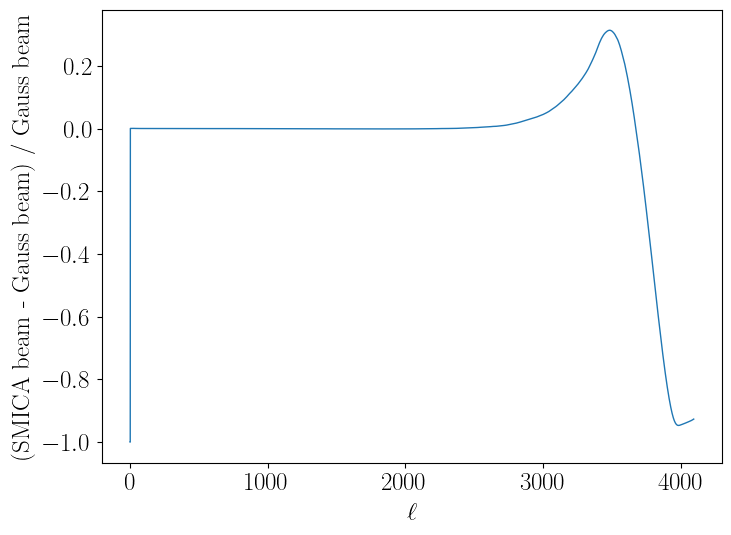

In [100]:
plt.plot((int_beam-gauss_beam[:len(int_beam)])/gauss_beam[:len(int_beam)])
plt.ylabel('(SMICA beam - Gauss beam) / Gauss beam')
plt.xlabel(r'$\ell$')